# Analysis of the competency evaluations of Bio-Tech students

**Academic programs considered as Bio-Tech** _(Taken from SAMP)_
> IBQ (Avenue/entry program)
>
> IAG
>
> IAL
>
> IBT
>
> IDS
>
> IQ

**Hypothesis:**

**Research questions:**
1. What are the competencies bio-tech students fail or struggle to success?
2. What are the formation units and type (Block, subject, Tec Week) bio-tech students fail or struggle to success?
3. To what extend affected the competency training and assessment of bio-tech students being fully online during COVID-19 pandemic period?
4. To what extend socio-demographic characteristics of bio-tech students correlate with competency evaluations?
5. To what extend academic grades of bio-tech students correlate with competency evaluations?

**Procedure to obtain the database:**
1. Seleccionamos los id de los estudiantes que aparecen asociados a estos programas alguna vez. Son 3771 id únicos.
2. Filtramos todos los registros de los estudiantes con esos ID.

**Características del modelo pedagógico y de la base de datos a tener en cuenta:**
1. Some students have a subcompetence evaluated as not observed for a subject but observed for another subject, e.g. student.id == 9455 and subcompetence `SING0203A` is evaluated as Not observed for subject 'Intelligent Logistics Networks' and Observed for 'Physical Experimentation and Statistical Thinking'.
2. Un estudiante puede haber hecho su periodo de entrada en un programa avenida (o de entrada) diferente a IBQ y luego haber pasado para un programa del área de biotecnologías. Por ejemplo el estudiante con ID 67048 cursó dos semestres en el programa IIT entrada que no es de biotecnología y luego pasó en el tercer semestre a IDS que sí es de biotecnología. Aunque no cursó la entrada de biotecnología, este estudiante puede tener las mismas competencias.

## Step 1 Loading data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading dataframe and showing the first 5 rows
bio_df = pd.read_csv('../sourcecode/EICData/Bio_students_v5.4.csv')
bio_df.drop(columns=['Unnamed: 0'], inplace=True)
bio_df.head()

,student.id,term_period.id,student.age,student.nationality,student.isForeign,student_originSchool.isITESM,campus.region_name,student.status_desc,student.isConditioned,student.cohort.id,...,competence.type,subcompetence.equivalent_key,subcompetence.desc,enrollment_period.id,semesters_from.enrollment,student.suject_semester_enrolled,group.size,program.isAvenue,subcompetence.observed_count,subcompetence.notobserved_count
0,67048,2020AD,18,Mexico,False,False,RCM,Regular Student,False,2020.0,...,General_education,SEG0603A,Understanding other codes,2020AD,1,11,5,True,1,0
1,67048,2020AD,18,Mexico,False,False,RCM,Regular Student,False,2020.0,...,General_education,SEG0101A,Self-knowledge,2020AD,1,11,30,True,1,0
2,67048,2020AD,18,Mexico,False,False,RCM,Regular Student,False,2020.0,...,General_education,SEG0102A,Wellness and self-regulation,2020AD,1,11,16,True,1,0
3,67048,2020AD,18,Mexico,False,False,RCM,Regular Student,False,2020.0,...,General_education,SEG0702A,Cutting-edge technologies,2020AD,1,11,34,True,1,0
4,67048,2020AD,18,Mexico,False,False,RCM,Regular Student,False,2020.0,...,Area,SING0301A,Problem evaluation,2020AD,1,11,34,True,1,0


In [3]:
bio_df.isnull().sum()

student.id                                           0
term_period.id                                       0
student.age                                          0
student.nationality                                  0
student.isForeign                                    0
student_originSchool.isITESM                         0
campus.region_name                                   0
student.status_desc                                742
student.isConditioned                                0
student.cohort.id                                  103
program.major_id                                     0
student.semester_desc                             1765
student.lastTerm_gpa                               209
student.lastTerm_gpa_program                    119152
student.term_gpa_program                           198
student.fte                                        284
subject.longName                                     0
subject.tec21Type_desc                               0
subject.ty

In [4]:
bio_df['term_period.id'].value_counts(dropna=False)

term_period.id
2022FJ    82440
2021AD    80813
2020AD    71121
2021FJ    62784
2019AD    52270
2020FJ    37783
Name: count, dtype: int64

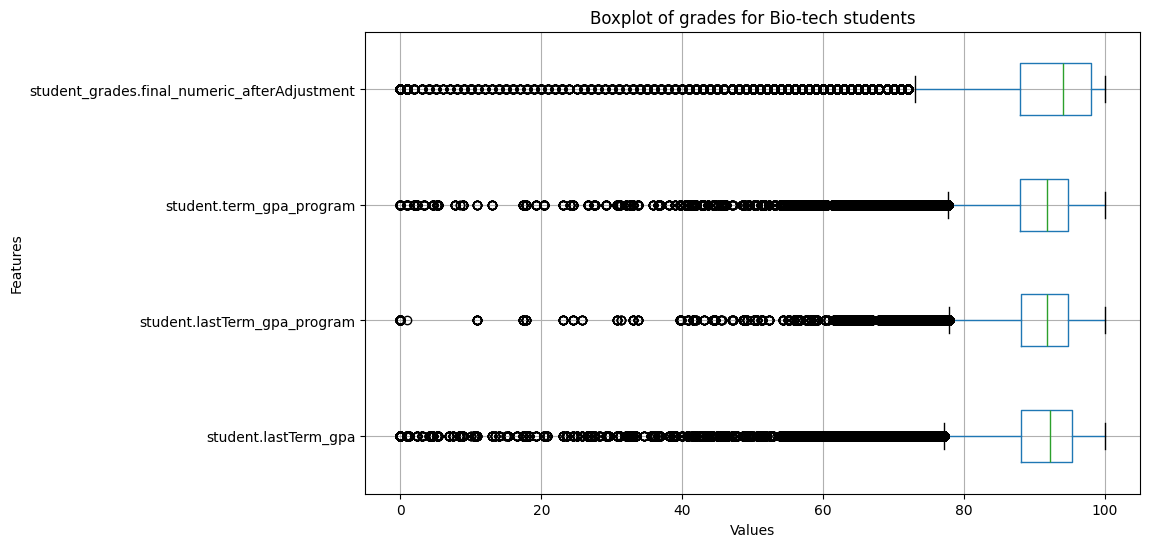

In [5]:
# Selecting the columns of interest
selected_cols = ['student.lastTerm_gpa', 
                 'student.lastTerm_gpa_program',
                 'student.term_gpa_program',
                 'student_grades.final_numeric_afterAdjustment']

fig, ax = plt.subplots(figsize=(10, 6))

# Create the boxplot
bio_df[selected_cols].boxplot(ax=ax, vert=False)

ax.set_title('Boxplot of grades for Bio-tech students')
ax.set_xlabel('Values')
ax.set_ylabel('Features')

plt.show()

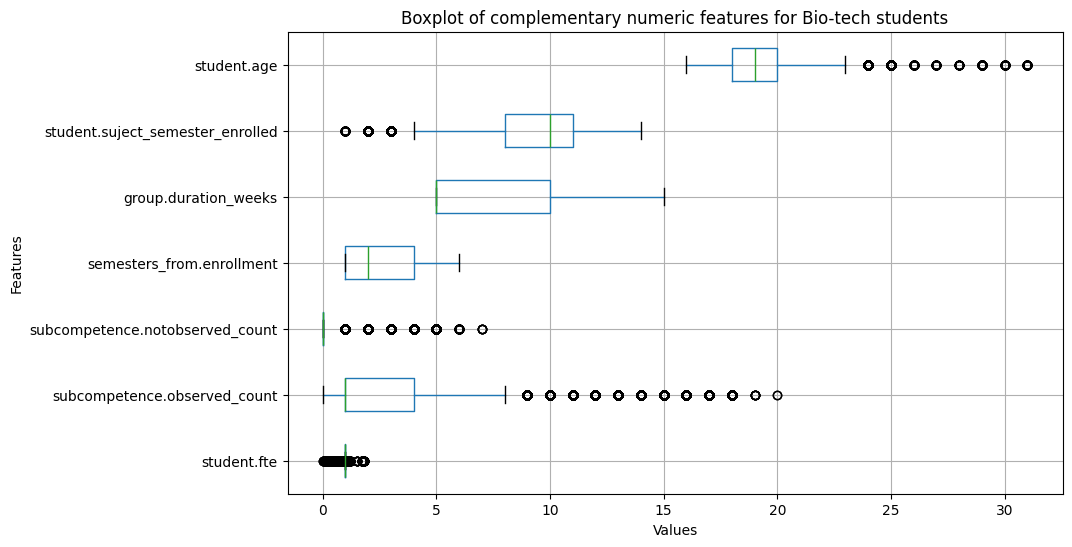

In [6]:
selected_cols = ['student.fte','subcompetence.observed_count','subcompetence.notobserved_count','semesters_from.enrollment',
                'group.duration_weeks','student.suject_semester_enrolled','student.age']
fig, ax = plt.subplots(figsize=(10, 6))

# Create the boxplot
bio_df[selected_cols].boxplot(ax=ax, vert=False)

ax.set_title('Boxplot of complementary numeric features for Bio-tech students')
ax.set_xlabel('Values')
ax.set_ylabel('Features')

plt.show()

In [7]:
# Describing FTE (time ratio dedicated by each student to courses) and group size
partial_df = bio_df[['group.size', 'student.fte']]
partial_df.describe()

,group.size,student.fte
count,387211.000000,386927.000000
mean,25.825834,0.961484
std,13.021312,0.104498
min,1.000000,0.000000
25%,20.000000,1.000000
50%,27.000000,1.000000
75%,31.000000,1.000000
max,365.000000,1.833330


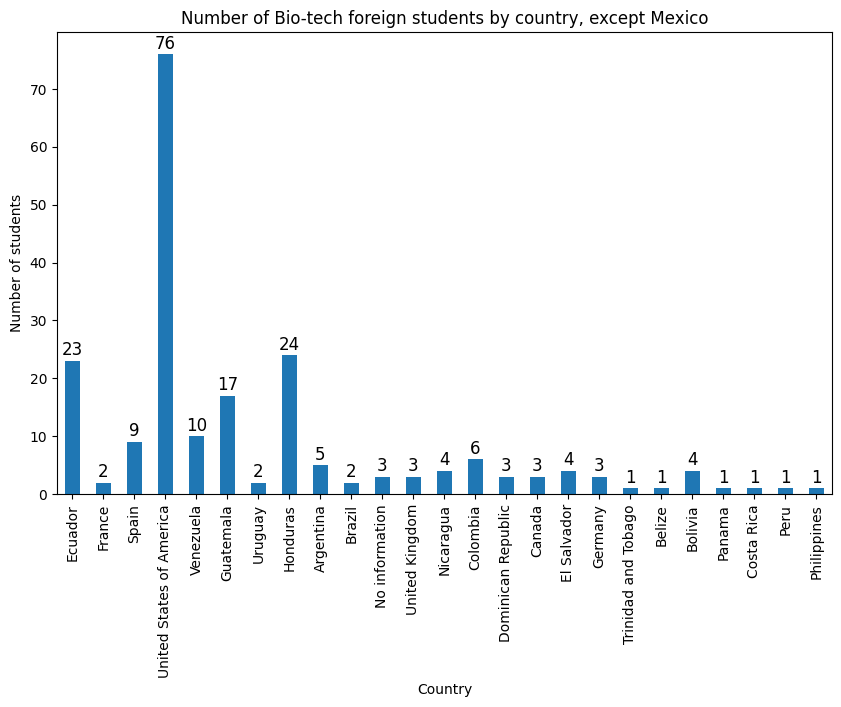

In [8]:
foreign_df = bio_df[bio_df['student.nationality'] != 'Mexico']
y = foreign_df['student.nationality'].unique().tolist()
x = [foreign_df[foreign_df['student.nationality'] == country]['student.id'].nunique() for country in y]
z = pd.DataFrame(x,y)
fig, ax = plt.subplots(figsize=(10, 6))
z.plot(kind='bar',legend=False, ax = ax)
plt.title('Number of Bio-tech foreign students by country, except Mexico')
plt.xlabel('Country')
plt.ylabel('Number of students')
for i, v in enumerate(x):
    ax.text(i, v + 1, str(v), ha='center', fontsize=12)
plt.show()

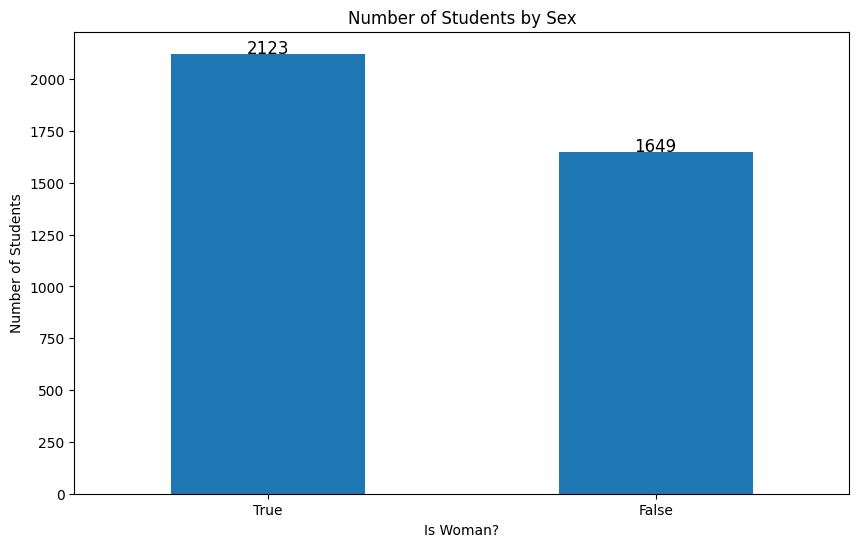

In [9]:
# Extract unique values of 'student.isWoman' and count unique student IDs per category
x = bio_df['student.isWoman'].unique().tolist()
y = [bio_df[bio_df['student.isWoman'] == sex]['student.id'].nunique() for sex in x]

z = pd.DataFrame({'Is Woman?': x, 'Number of Students': y}).set_index('Is Woman?')
fig, ax = plt.subplots(figsize=(10, 6))
z.plot(kind='bar', legend=False, ax=ax)
ax.set_title('Number of Students by Sex')
ax.set_xlabel('Is Woman?')
ax.set_ylabel('Number of Students')
for i, v in enumerate(y):
    ax.text(i, v + 1, str(v), ha='center', fontsize=12)
plt.xticks(rotation=0)
plt.show()

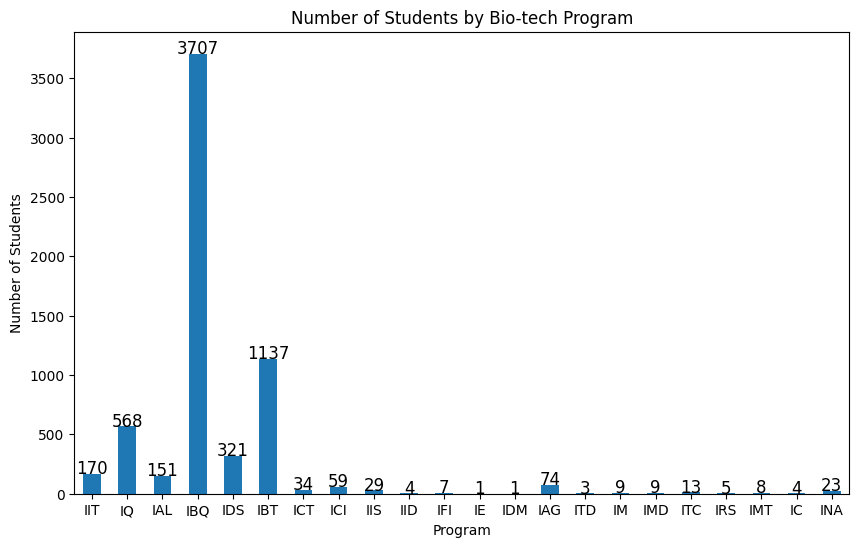

In [10]:
# Extract unique values of 'program.major_id' and count unique student IDs per category
# Qe are counting total of students per program. Some students may be repeated in more than one program 
# because they moved from one to another
x = bio_df['program.major_id'].unique().tolist()
y = [bio_df[bio_df['program.major_id'] == prog]['student.id'].nunique() for prog in x]

z = pd.DataFrame({'Program': x, 'Number of Students': y}).set_index('Program')
fig, ax = plt.subplots(figsize=(10, 6))
z.plot(kind='bar', legend=False, ax=ax)
ax.set_title('Number of Students by Bio-tech Program')
ax.set_xlabel('Program')
ax.set_ylabel('Number of Students')
for i, v in enumerate(y):
    ax.text(i, v + 1, str(v), ha='center', fontsize=12)
plt.xticks(rotation=0)
plt.show()

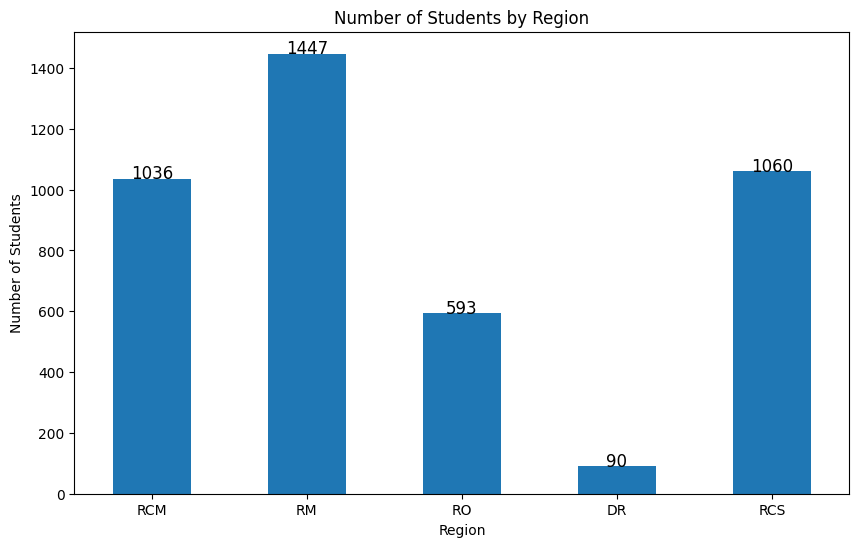

In [11]:
# Extract unique values of 'campus.region_name' and count unique student IDs per category
x = bio_df['campus.region_name'].unique().tolist()
y = [bio_df[bio_df['campus.region_name'] == region]['student.id'].nunique() for region in x]

z = pd.DataFrame({'Region': x, 'Number of Students': y}).set_index('Region')
fig, ax = plt.subplots(figsize=(10, 6))
z.plot(kind='bar', legend=False, ax=ax)
ax.set_title('Number of Students by Region')
ax.set_xlabel('Region')
ax.set_ylabel('Number of Students')
for i, v in enumerate(y):
    ax.text(i, v + 1, str(v), ha='center', fontsize=12)
plt.xticks(rotation=0)
plt.show()

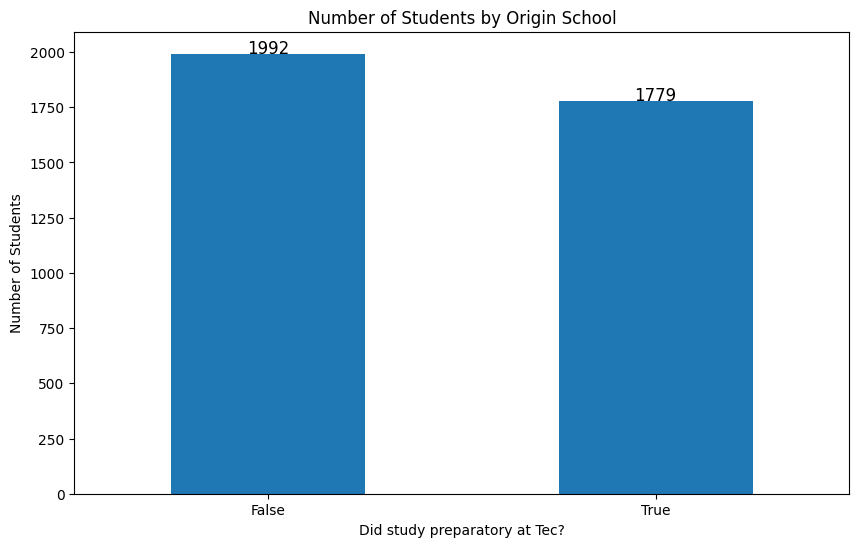

In [12]:
# Extract unique values of 'student_originSchool' and count unique student IDs per category
x = bio_df['student_originSchool.isITESM'].unique().tolist()
y = [bio_df[bio_df['student_originSchool.isITESM'] == orig]['student.id'].nunique() for orig in x]

z = pd.DataFrame({'Origin School': x, 'Number of Students': y}).set_index('Origin School')
fig, ax = plt.subplots(figsize=(10, 6))
z.plot(kind='bar', legend=False, ax=ax)
ax.set_title('Number of Students by Origin School')
ax.set_xlabel('Did study preparatory at Tec?')
ax.set_ylabel('Number of Students')
for i, v in enumerate(y):
    ax.text(i, v + 1, str(v), ha='center', fontsize=12)
plt.xticks(rotation=0)
plt.show()

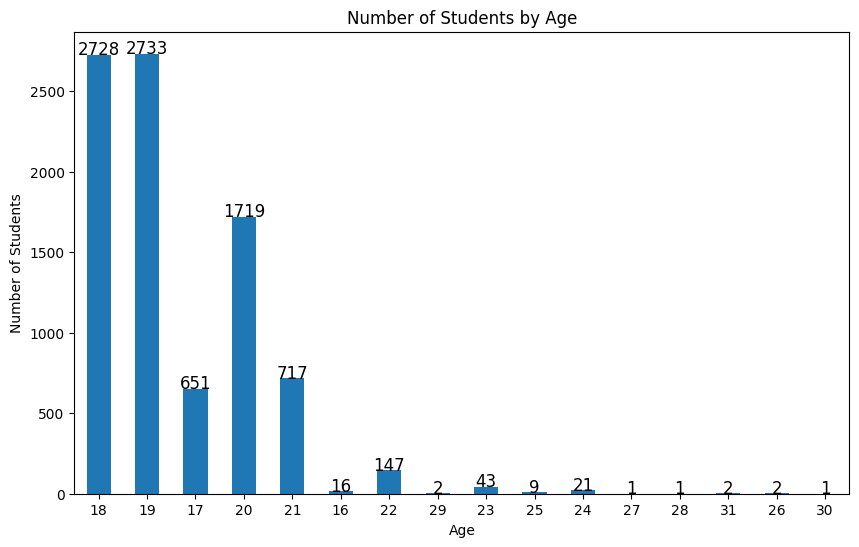

In [13]:
# Again this data should be read carefully because the same students is reported several time
# as the age is different at different academic period.
# Extract unique values of 'student.age' and count unique student IDs per category
x = bio_df['student.age'].unique().tolist()
y = [len(bio_df[bio_df['student.age'] == age]['student.id'].unique()) for age in x]

z = pd.DataFrame({'Age': x, 'Number of Students': y}).set_index('Age')
fig, ax = plt.subplots(figsize=(10, 6))
z.plot(kind='bar', legend=False, ax=ax)
ax.set_title('Number of Students by Age')
ax.set_xlabel('Age')
ax.set_ylabel('Number of Students')
for i, v in enumerate(y):
    ax.text(i, v + 1, str(v), ha='center', fontsize=12)
plt.xticks(rotation=0)
plt.show()

In [ ]:
# # Analysis of students with more than 25 years old
# older_students = bio_df[bio_df['student.age']>=25]
# older_students['student.id'].nunique()

In [ ]:
# print(f'Edades de los estudiantes mayores de 24')
# print(older_students.groupby(['student.age']).agg({'student.id':'nunique'}))
# print('\n')
# print(f'Cohortes de los estudiantes mayores de 24')
# print(older_students['student.cohort.id'].unique())
# print(older_students['student.cohort.id'].value_counts(dropna=False))
# print(older_students.groupby(['student.cohort.id']).agg({'student.id':'nunique'}))
# print('\n')
# print(f'Programas de los estudiantes mayores de 24')
# print(older_students['program.major_id'].value_counts(dropna=False))
# print(older_students.groupby(['program.major_id']).agg({'student.id':'nunique'}))
# print('\n')
# print(f'Semestres de los estudiantes mayores de 24')
# print(older_students.groupby(['semesters_from.enrollment']).agg({'student.id':'unique'}))


In [ ]:
# for student in older_students['student.id'].unique():
#     print(f'{student}: {older_students[older_students['student.id']==student]['program.major_id'].unique()}')

In [ ]:
# for student in older_students['student.id'].unique():
#     print(f'{student}: {older_students[older_students['student.id']==student]['semesters_from.enrollment'].unique()}')

In [ ]:
# for student in older_students['student.id'].unique():
#     print(f'{student}: {older_students[older_students['student.id']==student]['student.cohort.id'].unique()}')

In [ ]:
# Number of evaluations by competency
# pd.set_option("display.max_rows", None)
# bio_df['competence.desc'].value_counts()


In [14]:
# Making variable student.nationality binary 
bio_df['National'] = bio_df['student.nationality'] == 'Mexico'
bio_df.drop(columns=['student.nationality'], inplace=True)

In [15]:
bio_df['student.isForeign'].value_counts(dropna=False)

student.isForeign
False    255634
True     131577
Name: count, dtype: int64

In [16]:
dr_region_ids = bio_df[bio_df['campus.region_name'] == 'DR']['student.id'].unique()

In [17]:
bio_df[bio_df['student.id'].isin(dr_region_ids)]['student.id'].nunique()

90

In [18]:
for id in dr_region_ids:
    cond = bio_df['student.id'] == id
    regions = bio_df.loc[cond,'campus.region_name'].unique()
    
    if len(regions) > 1 and 'DR' in regions:
       regions = [region for region in regions if region != 'DR']
       bio_df.loc[cond, 'campus.region_name'] = regions[0]

In [ ]:
# bio_df[(bio_df['campus.region_name']=='DR') & (bio_df['semesters_from.enrollment'] == 6)]['student.cohort.id'].unique()

In [ ]:
# bio_df['student.status_desc'].value_counts(dropna=False)

In [ ]:
# bio_df[bio_df['student.isConditioned'] == True]['student.status_desc'].value_counts(dropna=False)

In [19]:
cond = (bio_df['student.status_desc'] == 'Regular Student') | (bio_df['student.status_desc'].isna())
bio_df.loc[:,'isRegular'] = cond


In [20]:
bio_df.drop(columns=['student.status_desc'], inplace = True)

In [ ]:
# bio_df['isRegular'].value_counts(dropna=False)

In [21]:
# Completar celdas vacías de cohort
bio_df['student.cohort.id'].value_counts(dropna=False)

student.cohort.id
2019.0    195563
2020.0    128969
2021.0     52087
2018.0      9123
2017.0       915
2016.0       307
2015.0       124
NaN          103
2014.0        20
Name: count, dtype: int64

In [22]:
bio_df.loc[bio_df['student.cohort.id'].isna(), 'student.cohort.id'] = 2020

In [23]:
# Filtrar el dataframe y dejar solo los registros que corresponden a carreras BioTech

biotech_programs = ['IBQ', 'IAG', 'IAL', 'IBT', 'IDS', 'IQ']
biotech_subcompetencies = bio_df[bio_df['program.major_id'].isin(biotech_programs)]['subcompetence.desc'].unique()
biotech_subcompetencies

array(['Demonstration of the functioning of systems in engineering and sciences',
       'Equipment Sizing', 'Interpretation of variables',
       'Recognition and empathy', 'Collaboration',
       'Application of standards and norms',
       'Experimental Obtaining of Parameters and Properties',
       'Self-knowledge', 'Wellness and self-regulation',
       'Scientific thought',
       'Explanation of the functioning of systems in engineering and sciences',
       'Application of Thermodynamic Fundamentals', 'Energy Integration',
       'Oral language', 'Determination of patterns',
       'Conscious entrepreneurship', 'Systemic thinking',
       'Written language', 'Decision making', 'Implementation of actions',
       'Problem evaluation', 'Understanding other codes',
       'Digital culture', 'Application of sustainability principles',
       'Innovation', 'Cutting-edge technologies', 'Critical thinking',
       'Dialogical communication',
       'Citizen commitment for social tran

In [24]:
bio_df_copy = bio_df[bio_df['subcompetence.desc'].isin(biotech_subcompetencies)].copy()
dropped_subcompetencies = set(bio_df['subcompetence.desc'].unique()) - set(bio_df_copy['subcompetence.desc'].unique())
print(f'{bio_df.shape[0] - bio_df_copy.shape[0]} rows removed')
for subc in dropped_subcompetencies:
    print(subc)

1942 rows removed
Computational Infrastructure Configuration
Design of Concrete Structures
Validate Technologies
Evaluates the Viability of Innovation Projects
Solution Strategies in the Health Area
Analysis of Biomedical Contexts
Performs Theoretical and Experimental Modeling of Processes
Development of Biomaterials and their Applications
Design Prototypes
Implementation of Experiments
Defines Innovation Opportunities
Software Component Design
Signal Processing and Data Analysis
Scientific Research Methodologies
Obtains Data from an Organizational Process for Understanding
Learning and Artificial Intelligence
Design of Steel Structures
Evaluates Feasibility of Mechatronic Developments
Characterization
Generation of Solutions
Complex Nanotechnology Problems
Pattern Recognition, Natural Language and Artificial Intelligence
Software Component Development
Data Structuring
Efficient Algorithms
Generation of Computational Models
Validate Embedded Systems
Design of Sewage Systems
Data Archit

In [25]:
exception_list = ['Use of Measurement Tools in Medical Biological Systems','Solution Strategies in the Health Area','Diagnosis of Problems in the Health Area','Analysis of Biomedical Contexts','Analysis of Medical Scenarios','Diagnosis of Needs in the Health Care Environment','Integration of Fontera Knowledge in Biomedical Devices','Development of Biomaterials and their Applications','Biomedical Technology Management, Evaluation and Transfer Processes']
bio_df[bio_df['subcompetence.desc'].isin(exception_list)]['program.major_id'].unique()


array(['IMD'], dtype=object)

In [26]:
# Tranformando las subcomeptencias evaluadas por los estudiantes en programas ICI, IIT, o ICT a IBQ
no_bio_entryprog = ['IIT', 'ICT', 'ICI']
bio_df_copy.loc[bio_df_copy['program.major_id'].isin(no_bio_entryprog), 'program.major_id'] = 'IBQ'

In [27]:
bio_df_copy.groupby(['student.id']).agg({'program.major_id':'unique'})

,program.major_id
student.id,
80,[IBQ]
201,[IBQ]
227,[IBQ]
338,"[IBQ, IFI, IDS]"
381,"[IBQ, IBT]"
...,...
722215,[IBQ]
724843,[IBQ]
728047,[IBQ]


In [28]:
# Transformando cualquier programa que no sea Bio por el programa Bio que le corresponde, 
# porque es una subcomeptencia que el estudiante formó y evaluó en otro programa, pero es una subcompetencia BioTech
no_biotech_programs = set(bio_df_copy['program.major_id'].unique()) - set(biotech_programs)
# no_biotech_programs

In [29]:
subcompetencies_by_prog = bio_df_copy.groupby(['program.major_id']).agg({'subcompetence.desc':'unique'})
for prog in biotech_programs:
    cond = (bio_df_copy['program.major_id'].isin(no_biotech_programs)) \
            & (bio_df_copy['subcompetence.desc'].isin(subcompetencies_by_prog.loc[prog, 'subcompetence.desc']))
    bio_df_copy.loc[cond, 'program.major_id'] = prog

In [30]:
bio_df_copy['program.major_id'].value_counts(dropna=False)

program.major_id
IBQ    252509
IBT     62050
IQ      32510
IDS     24611
IAL      9238
IAG      4351
Name: count, dtype: int64

In [31]:
# Eliminando variable semester_desc
bio_df_copy.drop(columns=['student.semester_desc'], inplace=True)

In [32]:
bio_df_copy[bio_df_copy['student_grades.final_numeric_afterAdjustment'].isna() == True]['subcompetence.level_assigned'].value_counts()

subcompetence.level_assigned
False    188
True      70
Name: count, dtype: int64

In [33]:
bio_df_copy.drop(columns=['student.lastTerm_gpa', 
                          'student.lastTerm_gpa_program', 
                          'group.isLIFE', 
                          'subject.type_desc', 
                          'group.hasEvaluationInst',
                          'program.isAvenue',
                          'subcompetence.equivalent_key'], inplace=True)

In [34]:
bio_df_copy.columns

Index(['student.id', 'term_period.id', 'student.age', 'student.isForeign',
       'student_originSchool.isITESM', 'campus.region_name',
       'student.isConditioned', 'student.cohort.id', 'program.major_id',
       'student.term_gpa_program', 'student.fte', 'subject.longName',
       'subject.tec21Type_desc', 'group.isVirtual', 'group.isEnglishLanguage',
       'student_grades.final_numeric_afterAdjustment', 'group.modality',
       'group.period', 'competence.desc', 'subcompetence.level_required',
       'subcompetence.level_assigned', 'student.isWoman',
       'group.duration_weeks', 'competence.type', 'subcompetence.desc',
       'enrollment_period.id', 'semesters_from.enrollment',
       'student.suject_semester_enrolled', 'group.size',
       'subcompetence.observed_count', 'subcompetence.notobserved_count',
       'National', 'isRegular'],
      dtype='object')

In [35]:
# Imputar valores vacíos en FTE
bio_df_copy[bio_df_copy['student.fte'].isna()]['student.suject_semester_enrolled'].value_counts()

student.suject_semester_enrolled
11    123
6      53
5      30
8      23
10     19
7      15
3       6
1       3
Name: count, dtype: int64

In [36]:

bio_df_copy.loc[bio_df_copy['student.fte'].isna(), 
                'student.fte'] = bio_df_copy.loc[bio_df_copy['student.fte'].isna(), 
                                                 'student.suject_semester_enrolled'] / 11


In [38]:
bio_df_copy.loc[bio_df_copy['competence.type'] == 'General_education', 'competence.type'] = 'Transversal'
bio_df_copy['competence.type'].value_counts(dropna=False)

competence.type
Transversal     169419
Area            169139
Disciplinary     46711
Name: count, dtype: int64

In [37]:
# Analyzing group modality

bio_df_copy['group.modality'].value_counts(dropna=False)

group.modality
Local remote group              152009
                                 89537
Synchronous hybrid group         55519
Face-to-face group               44257
Alternate face-to-face group     32704
National remote group             4455
Regional remote group             3286
Online group                      2456
Elite remote group                 965
Self-directed group                 81
Name: count, dtype: int64

In [39]:
bio_df_copy.drop(columns=['enrollment_period.id'], inplace=True)

In [40]:
# pd.reset_option("display.max_rows")
# pd.reset_option("display.max_columns")
bio_df[bio_df['student.id'] == 729462]['enrollment_period.id']

114617    2022FJ
114633    2022FJ
114634    2022FJ
114635    2022FJ
114636    2022FJ
114637    2022FJ
114638    2022FJ
114639    2022FJ
114640    2022FJ
114641    2022FJ
114642    2022FJ
114643    2022FJ
114644    2022FJ
114645    2022FJ
114646    2022FJ
114647    2022FJ
114648    2022FJ
114664    2022FJ
Name: enrollment_period.id, dtype: object

In [ ]:
bio_df_copy.to_csv('../sourcecode/EICData/Bio_students_v5.5.csv')

In [41]:
bio_df_copy.shape

(385269, 32)

In [42]:
bio_df_copy.columns

Index(['student.id', 'term_period.id', 'student.age', 'student.isForeign',
       'student_originSchool.isITESM', 'campus.region_name',
       'student.isConditioned', 'student.cohort.id', 'program.major_id',
       'student.term_gpa_program', 'student.fte', 'subject.longName',
       'subject.tec21Type_desc', 'group.isVirtual', 'group.isEnglishLanguage',
       'student_grades.final_numeric_afterAdjustment', 'group.modality',
       'group.period', 'competence.desc', 'subcompetence.level_required',
       'subcompetence.level_assigned', 'student.isWoman',
       'group.duration_weeks', 'competence.type', 'subcompetence.desc',
       'semesters_from.enrollment', 'student.suject_semester_enrolled',
       'group.size', 'subcompetence.observed_count',
       'subcompetence.notobserved_count', 'National', 'isRegular'],
      dtype='object')

In [44]:
bio_df = bio_df_copy.copy()

In [45]:
bio_df_copy.rename(columns={'student.id':'ID',
'term_period.id':'Term',
'student.age':'Age',
'student.isForeign':' Local',
'student_originSchool.isITESM':'Tec',
'campus.region_name':'Region',
'student.isConditioned':'Status',
'student.cohort.id':'Cohort',
'program.major_id':'Program',
'student_grades.final_numeric_afterAdjustment':'Grade',
'student.term_gpa_program':'AGPA',
'student.fte':'FTE',
'student.suject_semester_enrolled':'Units',
'subject.longName':'Subject',
'subject.tec21Type_desc':'ST',
'group.isVirtual':'Virtual',
'group.isEnglishLanguage':'Eng',
'group.modality':'Modality',
'group.period':'Period',
'competence.type':'Type',
'competence.desc':'Name',
'subcompetence.desc':'Sub',
'subcompetence.level_required':'Level',
'subcompetence.level_assigned':'Assigned',
'student.isWoman':'Woman',
'group.duration_weeks':'Weeks',
'semesters_from.enrollment':'SFE',
'group.size':'Group',
'subcompetence.observed_count':'ObservedCount',
'subcompetence.notobserved_count':'NotObservedCount'},inplace=True)

In [47]:
bio_df_copy['Modality'].value_counts(dropna=False)

Modality
Local remote group              152009
                                 89537
Synchronous hybrid group         55519
Face-to-face group               44257
Alternate face-to-face group     32704
National remote group             4455
Regional remote group             3286
Online group                      2456
Elite remote group                 965
Self-directed group                 81
Name: count, dtype: int64

In [73]:
bio_df_copy.loc[(bio_df_copy['Modality'] == ' Face-to-face group'),'Modality'] = 'Face-to-face'

In [74]:
bio_df_copy['Modality'].value_counts(dropna=False)

Modality
Local remote     152009
                  89537
Hybrid            88223
Face-to-face      44257
Others remote     11243
Name: count, dtype: int64

In [76]:
bio_df_copy

,ID,Term,Age,Local,Tec,Region,Status,Cohort,Program,AGPA,...,Weeks,Type,Sub,SFE,Units,Group,ObservedCount,NotObservedCount,National,isRegular
0,67048,2020AD,18,False,False,RCM,False,2020.0,IBQ,85.50,...,5,Transversal,Understanding other codes,1,11,5,1,0,True,True
1,67048,2020AD,18,False,False,RCM,False,2020.0,IBQ,85.50,...,5,Transversal,Self-knowledge,1,11,30,1,0,True,True
2,67048,2020AD,18,False,False,RCM,False,2020.0,IBQ,85.50,...,5,Transversal,Wellness and self-regulation,1,11,16,1,0,True,True
3,67048,2020AD,18,False,False,RCM,False,2020.0,IBQ,85.50,...,10,Transversal,Cutting-edge technologies,1,11,34,1,0,True,True
4,67048,2020AD,18,False,False,RCM,False,2020.0,IBQ,85.50,...,10,Area,Problem evaluation,1,11,34,1,0,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387206,39024,2022FJ,20,True,False,RCS,False,2019.0,IAL,90.88,...,5,Disciplinary,Sustainable food process design,6,9,20,1,0,True,True
387207,39024,2022FJ,20,True,False,RCS,False,2019.0,IAL,90.88,...,5,Disciplinary,Consumer food evaluation,6,9,20,1,0,True,True
387208,39024,2022FJ,20,True,False,RCS,False,2019.0,IAL,90.88,...,5,Transversal,Citizen commitment for social transformation,6,9,20,1,0,True,True
387209,39024,2022FJ,20,True,False,RCS,False,2019.0,IAL,90.88,...,5,Transversal,Critical thinking,6,9,20,7,0,True,True


In [75]:
bio_df_copy.to_csv('../sourcecode/EICData/Bio_students_v5.6.csv')